In [71]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import pycountry # https://pypi.org/project/pycountry/

import os
from datetime import datetime, timedelta

from rakott.mpl import savefig_bbox, fig_panel_labels

def int_to_dt(t):
    return pd.to_datetime(start_date) + timedelta(days=t)
def dt_to_days(t):
    return (t - datetime(2020, 1, 1)).days
def str_to_dt(t):
    return datetime.strptime(t, '%b %d %Y')

def date_to_int(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    td = dt - datetime(2020, 1, 1)
    return td.days
def date_to_date(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    return dt

date_range = [datetime(2020, 3, 1) + timedelta(weeks=i) for i in range(5)]
date_formatter = mpl.dates.DateFormatter('%b %d')

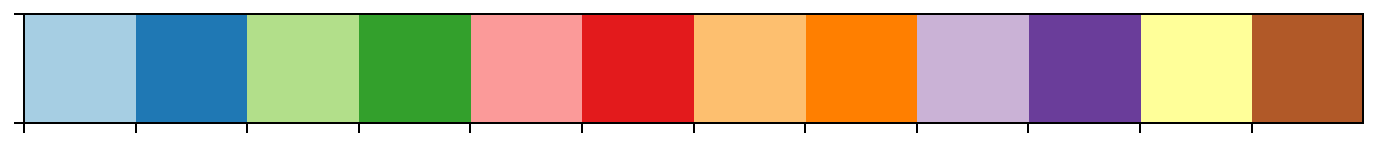

In [2]:
colors = sns.color_palette('Paired')
sns.palplot(colors)

In [3]:
def load_df(job_id, free):
    output_folder = r'../output/{}'.format(job_id)
    table_path = os.path.join(output_folder, 'tables', 'all-countries-{}.csv'.format(job_id))
    df = pd.read_csv(table_path)
    df = df.rename(columns={'official_τ': 'τ official'})
    df['country'] = df['country'].str.replace("_", " ")
    countries = df['country'].unique()
    country_color = {country: colors[i] for i, country in enumerate(countries)}
    df['color'] = [country_color[country] for country in df['country']]
    return df

In [4]:
job_id_free = '2020-05-26-Apr11'
job_id_fixed = '2020-06-25-Apr11-fixedtau'

df_free = load_df(job_id_free, free=True)
df_fixed = load_df(job_id_fixed, free=False)

In [5]:
print(df_free.shape, df_fixed.shape)
print(df_free.columns)

(12, 59) (11, 56)
Index(['country', 'WAIC', 'DIC using median', 'DIC using mean',
       'DIC using MAP', 'loglik(MAP)', 'loglik(mean)', 'loglik(median)', 'N',
       'p_steps', 'p_model_type', 'p_Td1', 'p_Td2', 'τ official', 'τ mean',
       'τ median', 'τ MAP', 'official τ from 1 Jan', 'τ mean from 1 Jan',
       'τ median from 1 Jan', 'τ MAP from 1 Jan', 'τ CI median (75%)',
       'τ CI median (95%)', 'τ CI mean (75%)', 'τ CI mean (95%)', 'Z mean',
       'Z median', 'Z MAP', 'D mean', 'D median', 'D MAP', 'μ mean',
       'μ median', 'μ MAP', 'β mean', 'β median', 'β MAP', 'α1 mean',
       'α1 median', 'α1 MAP', 'λ mean', 'λ median', 'λ MAP', 'α2 mean',
       'α2 median', 'α2 MAP', 'E0 mean', 'E0 median', 'E0 MAP', 'Iu0 mean',
       'Iu0 median', 'Iu0 MAP', 'Δt0 mean', 'Δt0 median', 'Δt0 MAP',
       'τ mean.1', 'τ median.1', 'τ MAP.1', 'color'],
      dtype='object')


In [25]:
def Re(α, β, D, μ):
    # Li et al 2020, SI pg 4
    return α*β*D + (1-α)*μ*β*D 

def apply_Re(df):
    df['Re pre-NPIs'] = Re(df['α1 median'], df['β median'], df['D median'], df['μ median'])
    df['Re post-NPIs'] = Re(df['α2 median'], df['λ median']*df['β median'], df['D median'], df['μ median'])
    df['Re pre-post ratio'] = 1 - df['Re post-NPIs']  / df['Re pre-NPIs']

In [26]:
apply_Re(df_free)
apply_Re(df_fixed)
df_free.head()

,country,WAIC,DIC using median,DIC using mean,DIC using MAP,loglik(MAP),loglik(mean),loglik(median),N,p_steps,...,Δt0 mean,Δt0 median,Δt0 MAP,τ mean.1,τ median.1,τ MAP.1,color,Re pre-NPIs,Re post-NPIs,Re pre-post ratio
0,Sweden,31.0665,-1639.4325,-1519.5816,33.1405,-11.0705,-787.4315,-847.3570,10183175,1000000,...,2.7186,2.3755,1.5389,17.3031,16.6742,20.4835,"(0.6509803921568628, 0.807843137254902, 0.8901...",1.619899,1.443963,0.108609
1,Belgium,215.9987,-428.4010,-3596.8006,60.3652,-15.6732,-1844.2561,-260.0563,11422068,1000000,...,2.5066,2.1756,1.4842,29.2992,30.2288,32.1712,"(0.12156862745098039, 0.47058823529411764, 0.7...",2.439832,1.039287,0.574033
2,United Kingdom,446.9603,-284.1251,-9230.9182,86.0777,-28.5914,-4687.0894,-213.6928,66488991,1000000,...,2.4068,2.0540,1.7261,31.7037,32.5896,33.6824,"(0.6980392156862745, 0.8745098039215686, 0.541...",2.778945,1.286044,0.537219
3,Switzerland,63.8905,-4348.4293,-4427.3198,65.7228,-26.7743,-2273.2956,-2233.8504,8516543,1000000,...,2.3850,1.9891,1.2732,27.8759,27.7772,28.1448,"(0.2, 0.6274509803921569, 0.17254901960784313)",2.712835,0.707612,0.739161
4,Wuhan,74.0955,27.0299,-446.6557,74.7881,-31.2646,-291.9865,-55.1437,10607700,1000000,...,2.6653,2.4248,1.3131,22.8258,23.0121,23.5787,"(0.984313725490196, 0.6039215686274509, 0.6)",2.971254,0.552222,0.814145


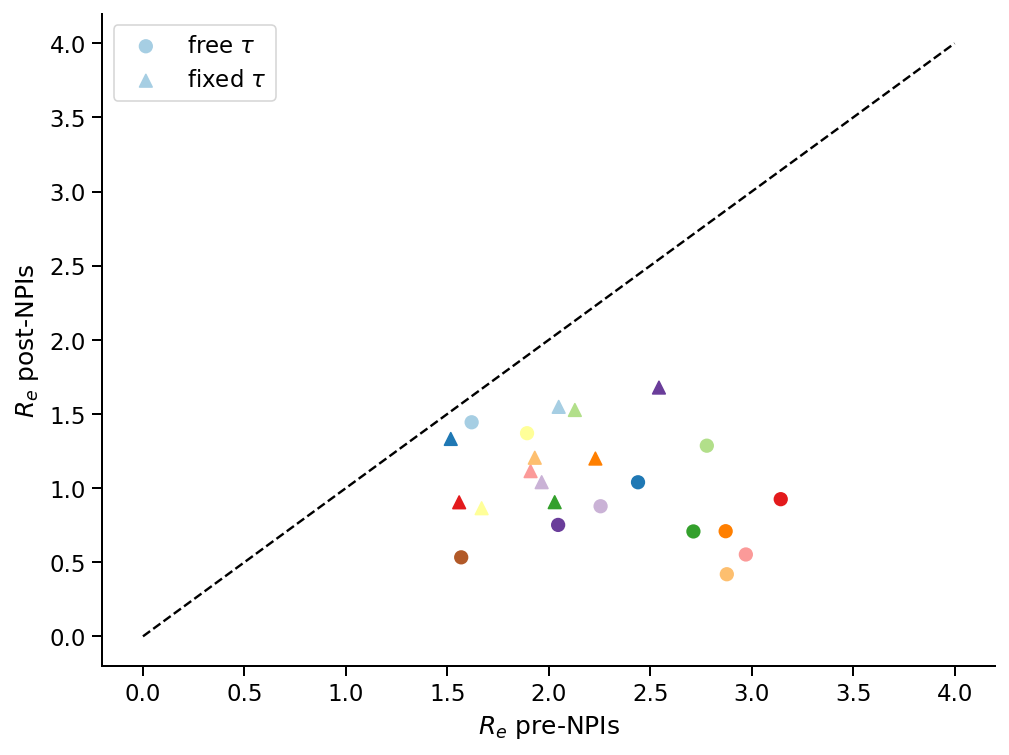

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter('Re pre-NPIs', 'Re post-NPIs', s=40, c='color', data=df_free, label=r'free $\tau$')
ax.scatter('Re pre-NPIs', 'Re post-NPIs', s=40, c='color', marker='^', data=df_fixed, label=r'fixed $\tau$')
ax.plot(np.linspace(0, 4), np.linspace(0, 4), color='k', ls='--')
ax.set(xlabel='$R_e$ pre-NPIs', ylabel='$R_e$ post-NPIs')
ax.legend()
sns.despine()

In [9]:
countries = df_fixed['country']

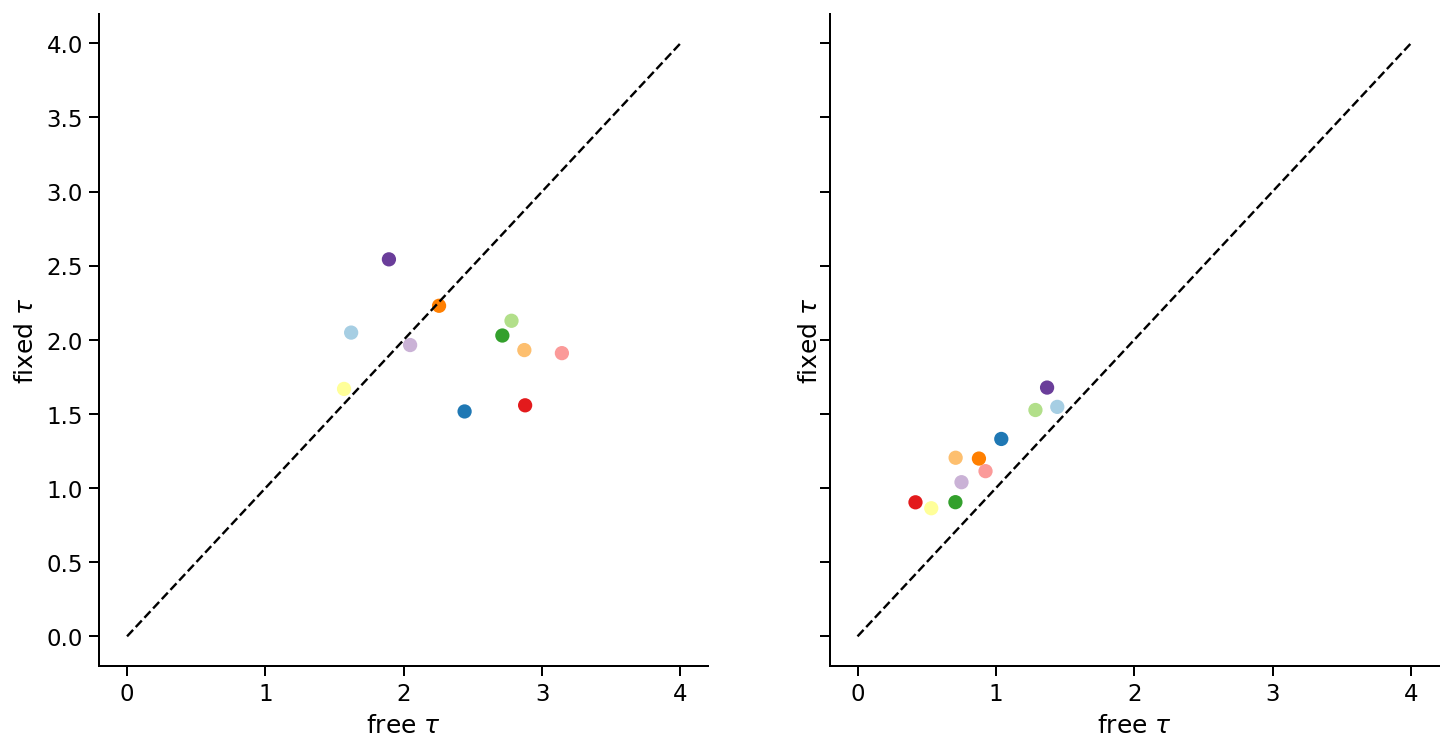

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
axes[0].scatter(df_free.loc[df_free['country'].isin(countries), 'Re pre-NPIs'], df_fixed.loc[df_fixed['country'].isin(countries), 'Re pre-NPIs'], s=40, c=df_fixed['color'])
axes[1].scatter(df_free.loc[df_free['country'].isin(countries), 'Re post-NPIs'], df_fixed.loc[df_fixed['country'].isin(countries), 'Re post-NPIs'], s=40, c=df_fixed['color'])
for ax in axes: 
    ax.plot(np.linspace(0, 4), np.linspace(0, 4), color='k', ls='--')
    ax.set(xlabel=r'free $\tau$', ylabel=r'fixed $\tau$')
sns.despine()

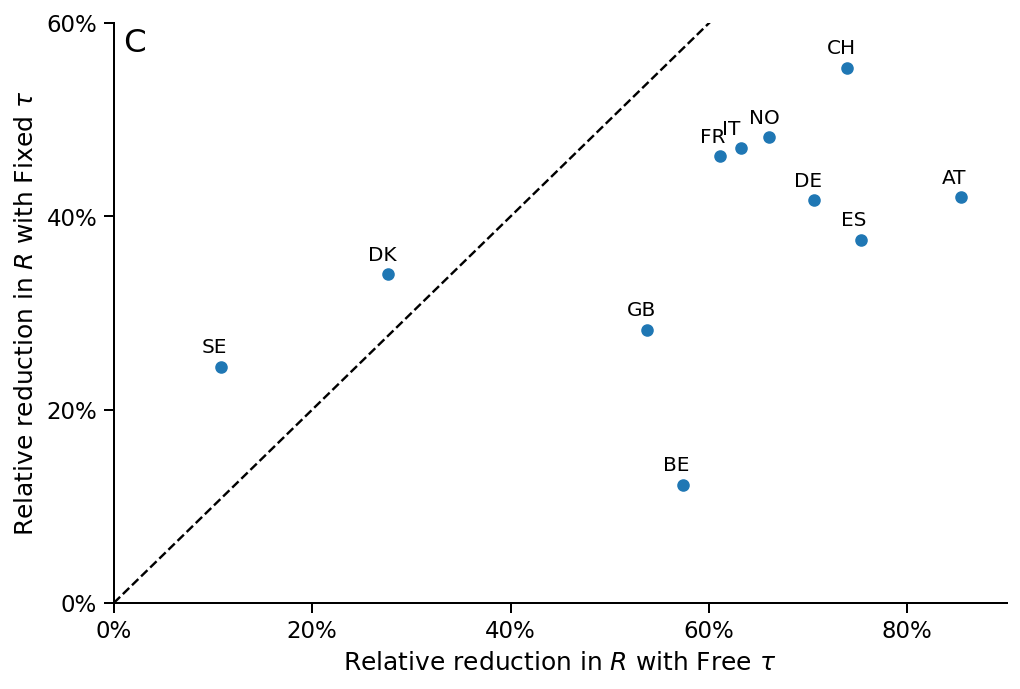

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8*2/3), sharex=True, sharey=True)
ax.scatter(
    df_free.loc[df_free['country'].isin(countries), 'Re pre-post ratio'], 
    df_fixed.loc[df_fixed['country'].isin(countries), 'Re pre-post ratio'], 
    s=30)#c=df_fixed['color'])
for i, country in enumerate(countries):
    ax.text(
        df_free.loc[df_free['country']==country, 'Re pre-post ratio']-0.02,
        df_fixed.loc[df_fixed['country']==country, 'Re pre-post ratio']+0.01,
        pycountry.countries.search_fuzzy(country)[0].alpha_2,
        horizontalalignment='left', verticalalignment='bottom', color='k', fontsize=10
    )
ax.plot(np.linspace(0, 1), np.linspace(0, 1), color='k', ls='--')
ax.set(xlim=(0, 0.9), ylim=(0, 0.6), xticks=np.arange(0, 1, 0.2), yticks=np.arange(0, 1, 0.2),
       xlabel=r'Relative reduction in $R$ with Free $\tau$', ylabel=r'Relative reduction in $R$ with Fixed $\tau$',)# xticks=np.arange(1, 8), yticks=np.arange(1,3))
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
fig_panel_labels(np.array([ax]), 'C', xcoord=0.01, ycoord=0.95)
sns.despine()
fig.savefig('../figures/Fig_Re.pdf', dpi=100)

In [120]:
dfs = []
for country in countries:
    output_folder = r'../output/{}/figures/Re_{}.csv'.format(job_id_free, country.replace(' ', '_'))
    df = pd.read_csv(output_folder)
    df['country'] = country
    df['model'] = 'free'
    dfs.append(df)
    output_folder = r'../output/{}/figures/Re_{}.csv'.format(job_id_fixed, country.replace(' ', '_'))
    df = pd.read_csv(output_folder)
    df['country'] = country
    df['model'] = 'fixed'
    dfs.append(df)
    
df = pd.concat(dfs)
df.head()

,Re_pre,Re_post,rel_reduc_Re,country,model
0,1.978149,1.636072,0.172928,Sweden,free
1,2.163743,1.472847,0.319306,Sweden,free
2,2.343015,1.737785,0.258313,Sweden,free
3,2.089732,1.492890,0.285607,Sweden,free
4,1.192440,1.495906,-0.254491,Sweden,free


In [121]:
grp = df.groupby(['country', 'model'])

In [148]:
agg = grp.agg(
    low=pd.NamedAgg(column="rel_reduc_Re", aggfunc=lambda x: np.percentile(x, 25)),
    median=pd.NamedAgg(column="rel_reduc_Re", aggfunc=np.median),
    high=pd.NamedAgg(column="rel_reduc_Re", aggfunc=lambda x: np.percentile(x, 75))
).reset_index()

In [149]:
agg

,country,model,low,median,high
0,Austria,fixed,0.316040,0.412143,0.513237
1,Austria,free,0.813395,0.852543,0.888647
2,Belgium,fixed,-0.062680,0.096680,0.244926
3,Belgium,free,0.457211,0.564566,0.625702
4,Denmark,fixed,0.256628,0.381951,0.500711
5,Denmark,free,0.069717,0.297105,0.452810
6,France,fixed,0.397640,0.450492,0.504891
7,France,free,0.578566,0.615781,0.649898
8,Germany,fixed,0.363200,0.406926,0.448212
9,Germany,free,0.661431,0.696426,0.731384


In [150]:
df_free = agg[agg['model'] == 'free']
df_fixed = agg[agg['model'] == 'fixed']
countries = agg['country'].unique()

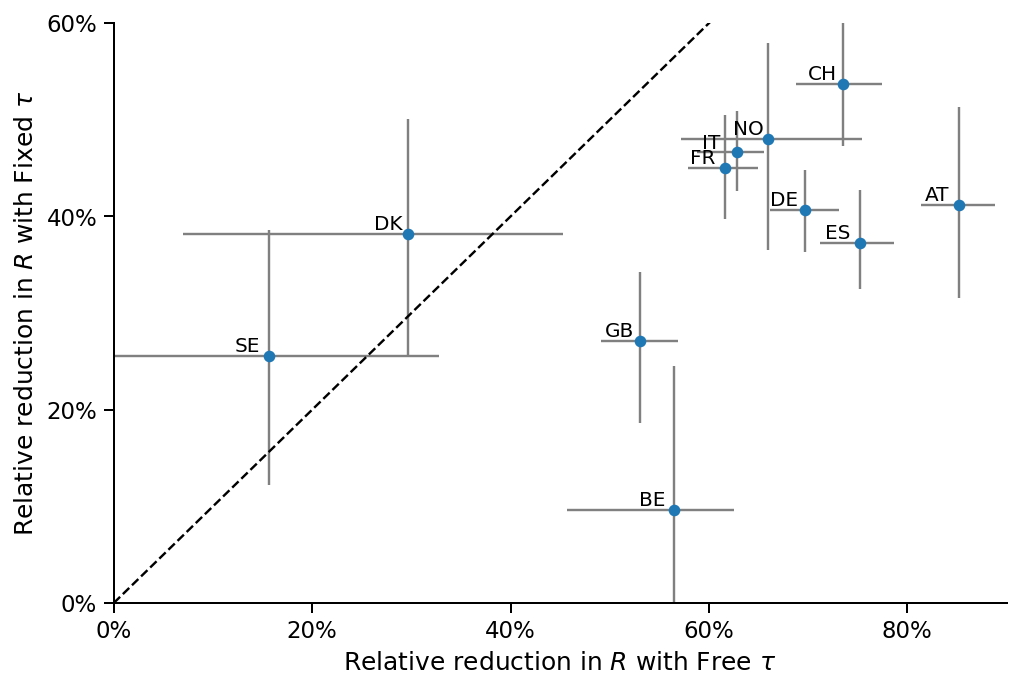

In [169]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8*2/3), sharex=True, sharey=True)
ax.errorbar(
    df_free['median'], 
    df_fixed['median'], 
    xerr=[df_free['median']-df_free['low'], df_free['high']-df_free['median']],
    yerr=[df_fixed['median']-df_fixed['low'], df_fixed['high']-df_fixed['median']],
    ls='', marker='o',  ecolor='gray'
)
for i, country in enumerate(countries):
    ax.text(
        df_free.loc[df_free['country']==country, 'median']-0.035,
        df_fixed.loc[df_fixed['country']==country, 'median'],
        pycountry.countries.search_fuzzy(country)[0].alpha_2,
        horizontalalignment='left', verticalalignment='bottom', color='k', fontsize=10
    )
ax.plot(np.linspace(0, 1), np.linspace(0, 1), color='k', ls='--')
ax.set(xlim=(0, 0.9), ylim=(0, 0.6), xticks=np.arange(0, 1, 0.2), yticks=np.arange(0, 1, 0.2),
       xlabel=r'Relative reduction in $R$ with Free $\tau$', ylabel=r'Relative reduction in $R$ with Fixed $\tau$',)# xticks=np.arange(1, 8), yticks=np.arange(1,3))
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

sns.despine()
fig.savefig('../figures/Fig_Re.pdf', dpi=100)